<a href="https://colab.research.google.com/github/dmswl0707/Sodescar/blob/eunji/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [99]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/socar_reservation_triplog.csv')
data.tail()

,reservation_id,car_id,member_id_encrypted,region,reservation_return_at,reservation_start_at,member_age,member_gender,member_created_date,member_total_distance,is_vroom,car_name,zone_name,zone_address,zone_lat,zone_lng,zone_type1,zone_type2,zone_type3,reservation_created_lat,reservation_created_lng,trip
751543,25230734,12133,EfUz3ev4ykYFkJ6t4Eg4ML5fkur2s8Rg/LqDEdZTxpo=,서울특별시 성북구,2019-08-16 17:58:45,2019-08-16 14:50:00,27,male,2019-06-09,4756.0,True,미니클럽맨,서울 돌곶이역[V],서울 성북구 석관동 245-4,37.610798,127.058172,NaN,NaN,NaN,NaN,NaN,NaN
751544,25230739,16346,isNozhU/SlfjlXncrzi20TgQEev2hiSf+JH/13Vzt1Y=,경기도 의정부시,2019-08-16 20:29:58,2019-08-15 21:40:00,31,male,2018-03-09,10799.0,False,올뉴K3,AJ파크 의정부 센트럴타워,경기 의정부시 의정부동 494 센트럴타워,37.738066,127.044092,TRANSFER_SUBWAY,COMMERCIAL_HOTSPOT,NaN,NaN,NaN,"경기도 양주시,경기도 고양시 일산서구,경기도 양주시,경기도 고양시 일산서구"
751545,25230740,18217,DBVfEBiHB2Fq4PgtorxeD6SKjkvP+yeofER1mjQ6OD0=,서울특별시 강남구,2019-08-16 00:39:36,2019-08-15 22:00:00,28,male,2015-06-10,9080.0,False,더뉴레이,대승주차장,서울 강남구 대치동 984-12,37.500908,127.066643,LIVING_APT,LIVING_VILLA,COMMERCIAL_HOTSPOT,NaN,NaN,서울특별시 노원구
751546,25230763,8420,2akRtQ2yPc0zFkPX1EGe72+tJPXrOhFKHmlOiwiwYY0=,서울특별시 강서구,2019-08-16 04:39:18,2019-08-15 21:40:00,21,male,2016-08-04,932.0,False,넥스트스파크,삼영주차장,서울 강서구 화곡동 110-65,37.543930,126.843872,LIVING_VILLA,LIVING_ETC,ETC,NaN,NaN,"인천광역시 중구,서울특별시 강서구,서울특별시 영등포구,서울특별시 강서구"
751547,25230776,18322,pKyxVpBU8+VcqT/J4ZLxYLHGBR3T7rH636FQuFbhWwo=,서울특별시 성북구,2019-08-16 20:47:34,2019-08-16 16:30:00,38,male,2016-10-13,27556.0,False,더뉴레이,삼선교주차장,서울 성북구 삼선동4가 18-6,37.588623,127.010368,LIVING_ETC,COMMERCIAL_OFFICE,ETC,NaN,NaN,"서울특별시 중구,서울특별시 광진구"


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751548 entries, 0 to 751547
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   reservation_id           751548 non-null  int64  
 1   car_id                   751548 non-null  int64  
 2   member_id_encrypted      751548 non-null  object 
 3   region                   751548 non-null  object 
 4   reservation_return_at    751548 non-null  object 
 5   reservation_start_at     751548 non-null  object 
 6   member_age               751548 non-null  int64  
 7   member_gender            699017 non-null  object 
 8   member_created_date      751548 non-null  object 
 9   member_total_distance    738010 non-null  float64
 10  is_vroom                 751548 non-null  bool   
 11  car_name                 751548 non-null  object 
 12  zone_name                750774 non-null  object 
 13  zone_address             751548 non-null  object 
 14  zone

In [100]:
# 결측치 제거
data = data.dropna()

In [101]:
## 어떤 컬럼을 이용하는 게 좋을까요?
data = data.drop(['reservation_id', 'zone_address', 'member_id_encrypted'],1)
data.head()

,car_id,region,reservation_return_at,reservation_start_at,member_age,member_gender,member_created_date,member_total_distance,is_vroom,car_name,zone_name,zone_lat,zone_lng,zone_type1,zone_type2,zone_type3,reservation_created_lat,reservation_created_lng,trip
216985,12364,경기도 성남시 분당구,2019-08-28 19:01:39,2019-08-28 09:00:00,37,male,2015-06-14,2811.0,False,G80,탑월드주차빌딩,37.340355,127.109756,TRANSFER_SUBWAY,COMMERCIAL_OFFICE,COMMERCIAL_HOTSPOT,37.312697,127.080804,"경기도 용인시 수지구,경기도 용인시 수지구,경기도 안성시"
217040,5405,경기도 김포시,2019-08-22 13:59:53,2019-08-22 10:20:00,31,female,2018-05-10,596.0,True,프라이드,한화 유로메트로 2단지 주차장,37.602009,126.726845,LIVING_APT,ETC,ETC,37.619122,126.711335,"인천광역시 서구,경기도 김포시"
217064,9884,경기도 고양시 일산서구,2019-08-22 06:07:06,2019-08-21 18:00:00,21,male,2016-10-06,1590.0,False,투싼(경유),일산역 2번출구 우측 일산역 1주차장,37.682224,126.770534,LIVING_APT,TRANSFER_SUBWAY,ETC,37.689224,126.779282,"서울특별시 영등포구,경기도 고양시 일산동구,경기도 고양시 일산동구,경기도 고양시 일..."
217069,8927,경기도 고양시 일산동구,2019-08-22 13:58:20,2019-08-21 16:40:00,32,male,2016-05-24,3897.0,False,스포티지,일산경찰서사거리,37.663581,126.768347,COMMERCIAL_HOTSPOT,TRANSFER_SUBWAY,ETC,37.663684,126.768305,"경기도 가평군,경기도 가평군"
217182,9532,경기도 남양주시,2019-08-21 22:10:10,2019-08-21 18:10:00,25,male,2018-05-12,87.0,False,아반떼AD,와부 제3공영주차장,37.578609,127.225090,LIVING_APT,LIVING_VILLA,TRANSFER_SUBWAY,37.548415,127.240661,경기도 남양주시


In [102]:
data['reservation_start_at'] = pd.to_datetime(data['reservation_start_at'])
data['reservation_return_at'] = pd.to_datetime(data['reservation_return_at'])

In [103]:
data['이용시간']=((data['reservation_start_at'] - data['reservation_return_at']))
data = data.sample(frac=1, random_state=0).reset_index(drop=True)
data.head()

,car_id,region,reservation_return_at,reservation_start_at,member_age,member_gender,member_created_date,member_total_distance,is_vroom,car_name,zone_name,zone_lat,zone_lng,zone_type1,zone_type2,zone_type3,reservation_created_lat,reservation_created_lng,trip,이용시간
0,15676,서울특별시 강남구,2019-08-23 23:42:19,2019-08-23 22:00:00,30,male,2018-08-04,5284.0,False,더뉴아반떼,강남센터뷰,37.474391,127.107085,LIVING_APT,LIVING_ETC,TRANSFER_BUS,37.474503,127.107548,서울특별시 광진구,-1 days +22:17:41
1,9192,경기도 남양주시,2019-09-10 15:59:47,2019-09-09 11:20:00,49,female,2015-05-08,25840.0,False,티볼리(경유),유진마젤란 21아파트 1307동 앞,37.643772,127.236336,LIVING_APT,TRANSFER_BUS,ETC,37.660944,127.249898,"경기도 양평군,경기도 이천시,경기도 남양주시,경기도 성남시 분당구,경기도 성남시 분...",-2 days +19:20:13
2,10877,부산광역시 강서구,2019-11-13 20:28:32,2019-11-13 14:30:00,42,female,2019-11-12,881.0,False,쏘나타 뉴라이즈(LPG),강동주차장,35.179012,128.951907,TRANSFER_STATION,TRANSFER_SUBWAY,ETC,35.178398,128.947261,"부산광역시 서구,부산광역시 서구,부산광역시 해운대구",-1 days +18:01:28
3,7962,경기도 고양시 일산동구,2019-10-21 00:07:38,2019-10-20 12:10:00,37,male,2016-11-28,16509.0,True,레이,하늘마을 1단지,37.679960,126.779579,LIVING_APT,ETC,ETC,37.562260,126.889919,"경기도 파주시,경기도 파주시,경기도 파주시,경기도 고양시 덕양구",-1 days +12:02:22
4,16579,경기도 안양시 동안구,2019-10-12 19:00:00,2019-10-09 07:00:00,34,female,2015-08-19,2569.0,False,올뉴모닝,아이퍼스트타워,37.400352,126.976074,LIVING_ETC,TRANSFER_SUBWAY,COMMERCIAL_HOTSPOT,37.397518,126.979505,"경기도 안양시 동안구,경기도 안양시 동안구,경기도 안양시 동안구,경기도 고양시 일산...",-4 days +12:00:00


In [104]:
# 임의의 컬럼 분석(나이 분포)
data['member_age'].describe()

count    124755.000000
mean         31.686089
std           8.815163
min          21.000000
25%          25.000000
50%          29.000000
75%          37.000000
max          78.000000
Name: member_age, dtype: float64

(array([4.2847e+04, 3.7334e+04, 1.9065e+04, 1.0073e+04, 9.1460e+03,
        4.4310e+03, 1.2940e+03, 4.7600e+02, 8.5000e+01, 4.0000e+00]),
 array([21. , 26.7, 32.4, 38.1, 43.8, 49.5, 55.2, 60.9, 66.6, 72.3, 78. ]),
 <a list of 10 Patch objects>)

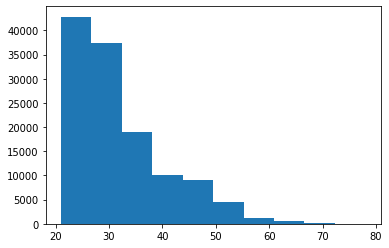

In [105]:
plt.hist(data['member_age'], bins=10)

In [ ]:
data.shape

(837732, 13)

In [ ]:
# train 부분은 80%, test 부분은 20%
train = data[:670000]
test = data[67000:]

In [ ]:
x_train = np.asarray()
y_train = np.asarray()
x_test = np.asarray()
y_test = np.asarray()